In [2]:
# pip install yfinance
import yfinance as yf
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)
stock = "GOOG"
google_data = yf.download(stock, start, end, auto_adjust = False)

[*********************100%***********************]  1 of 1 completed


In [3]:
google_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2005-06-17,6.940079,6.981332,6.981332,6.871743,6.948954,418940428
2005-06-20,7.098540,7.140735,7.164894,6.767882,6.876475,844140229
2005-06-21,7.126766,7.169128,7.230399,7.097646,7.174857,607560783
2005-06-22,7.162915,7.205492,7.280710,7.189801,7.214708,420530365
2005-06-23,7.173066,7.215704,7.342728,7.135753,7.173113,564363474


In [4]:
google_data.shape

(5031, 6)

In [5]:
google_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03
mean,52.249007,52.532794,53.075952,51.977000,52.511193,9.832776e+07
std,49.499825,49.728236,50.271970,49.187177,49.699271,1.234155e+08
min,6.374077,6.411966,6.709103,6.159413,6.538243,1.584340e+05
25%,13.833858,13.916089,14.089813,13.726799,13.945853,2.587200e+07
50%,29.541809,29.717411,30.059580,29.469000,29.778631,4.596585e+07
75%,72.534344,72.965500,73.741978,72.211250,73.026249,1.219454e+08
max,207.224548,207.710007,208.699997,204.259995,204.500000,1.650833e+09


In [6]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 2005-06-17 to 2025-06-16
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  5031 non-null   float64
 1   (Close, GOOG)      5031 non-null   float64
 2   (High, GOOG)       5031 non-null   float64
 3   (Low, GOOG)        5031 non-null   float64
 4   (Open, GOOG)       5031 non-null   float64
 5   (Volume, GOOG)     5031 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.1 KB


In [7]:
google_data.isna().sum()

,,0
Price,Ticker,
Adj Close,GOOG,0
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

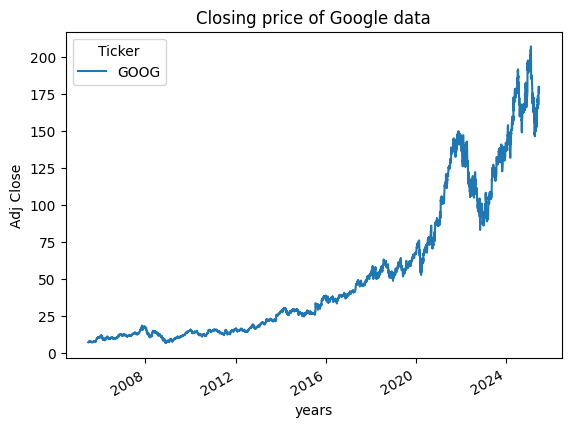

In [9]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [10]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [11]:
google_data.columns

MultiIndex([('Adj Close', 'GOOG'),
            (    'Close', 'GOOG'),
            (     'High', 'GOOG'),
            (      'Low', 'GOOG'),
            (     'Open', 'GOOG'),
            (   'Volume', 'GOOG')],
           names=['Price', 'Ticker'])

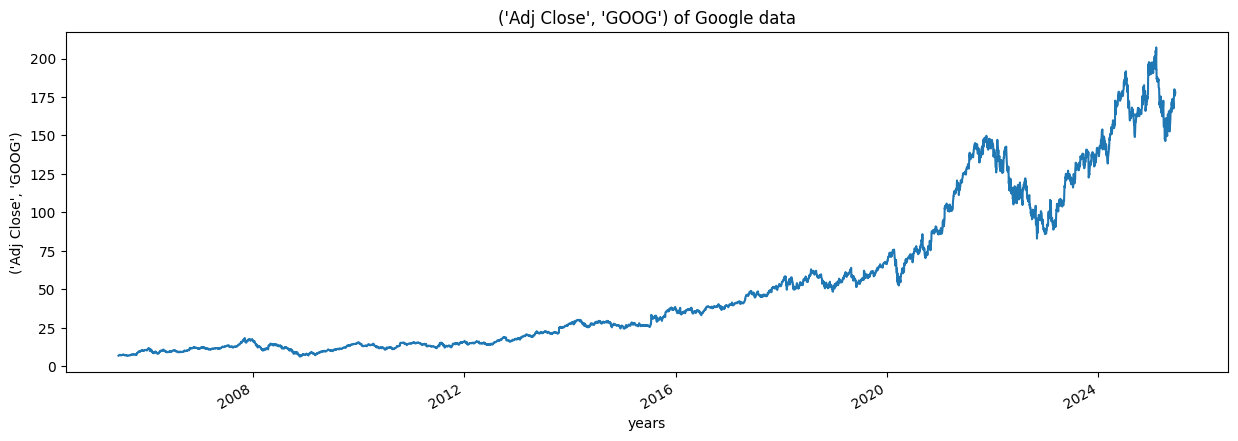

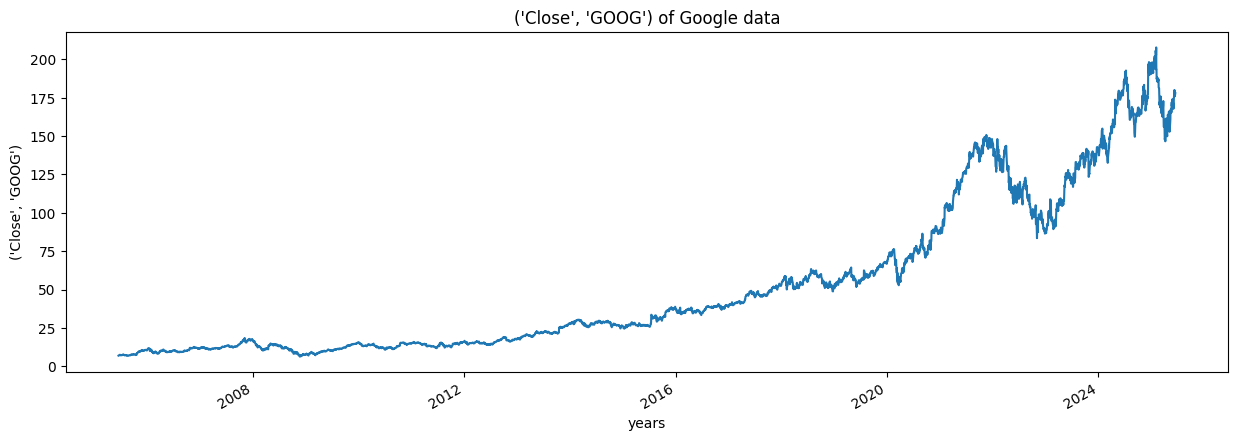

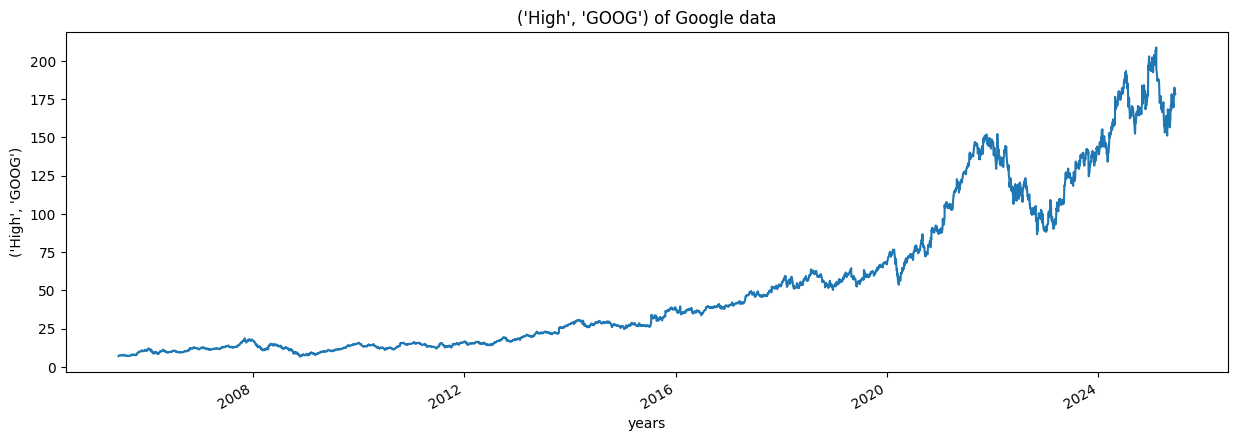

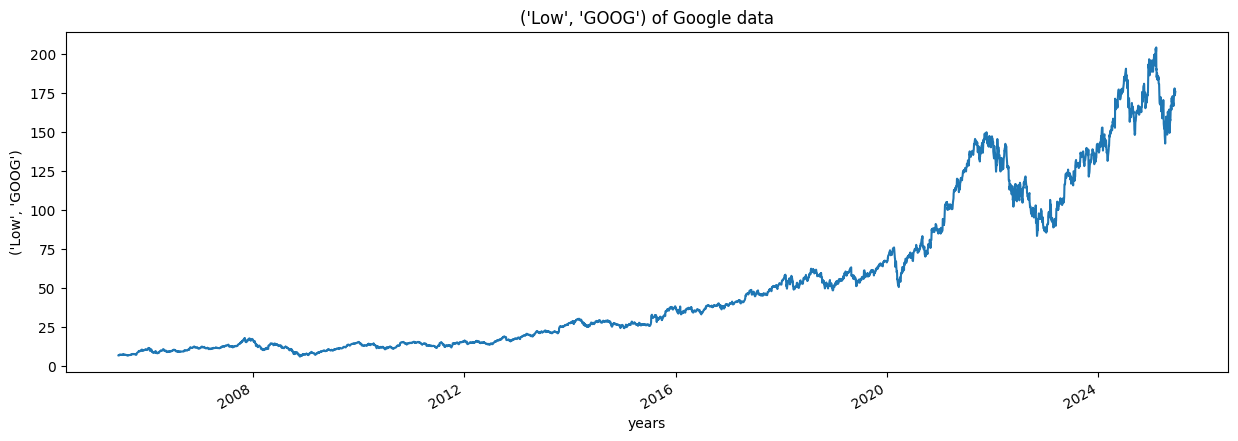

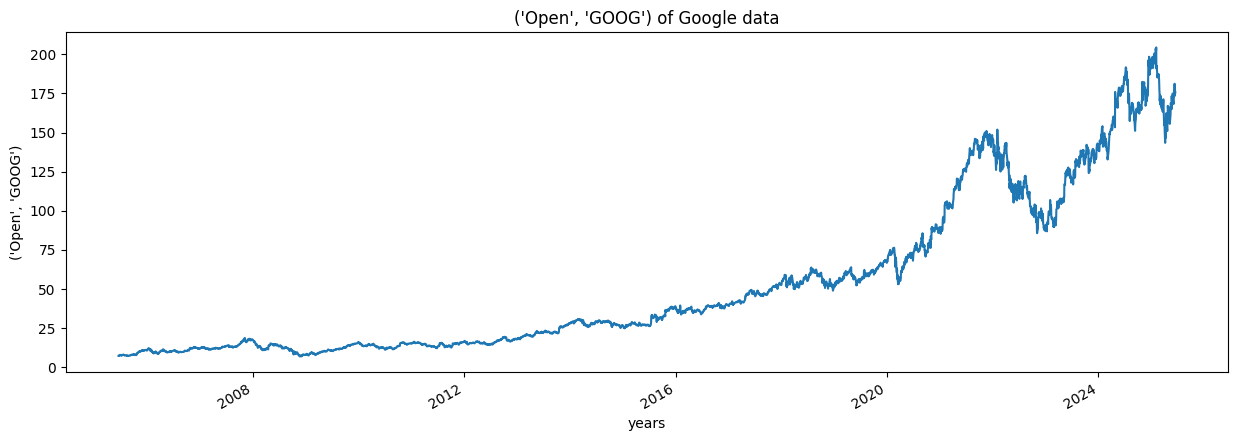

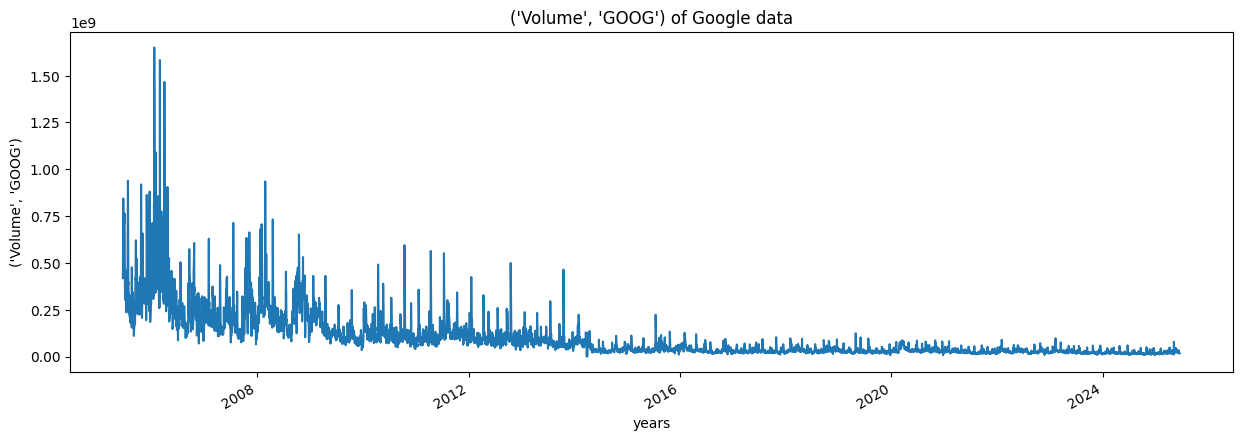

In [12]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [13]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 137
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [14]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [15]:
google_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2006-06-08,NaN
2006-06-09,NaN
2006-06-12,NaN
2006-06-13,NaN
2006-06-14,8.930949


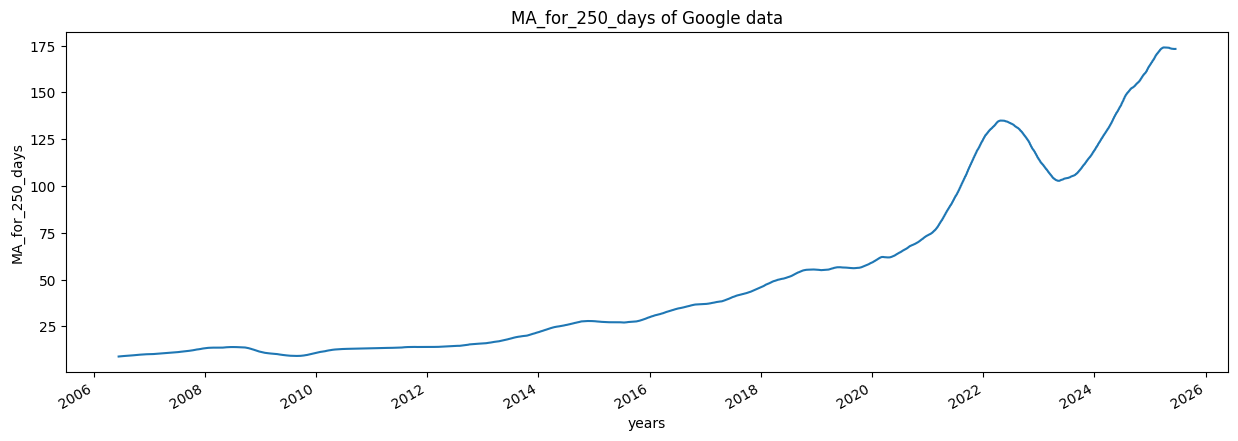

In [16]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

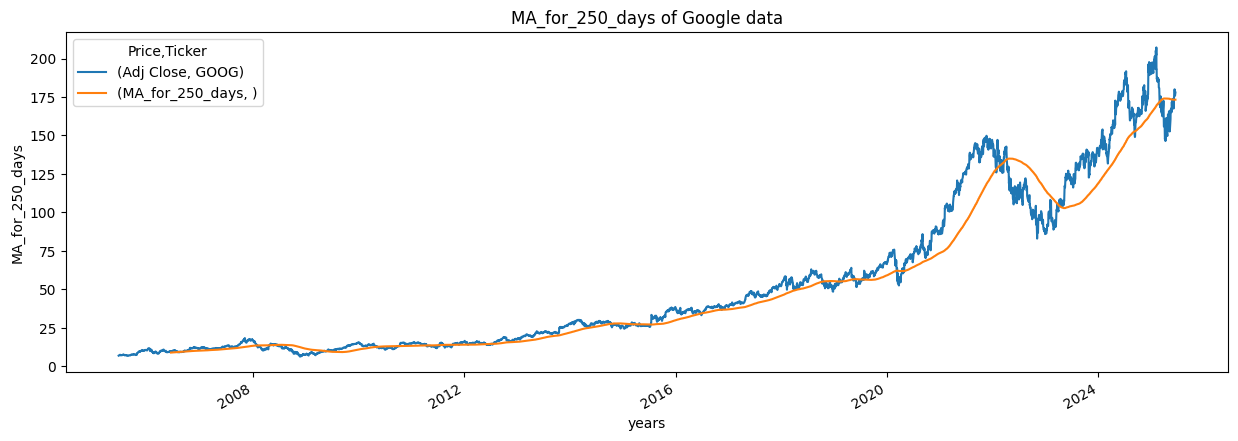

In [17]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

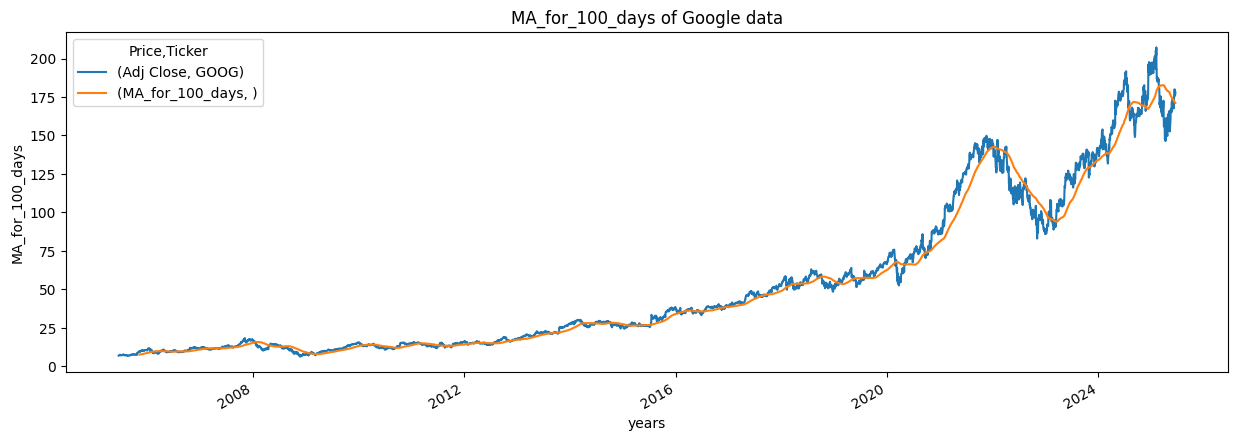

In [18]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

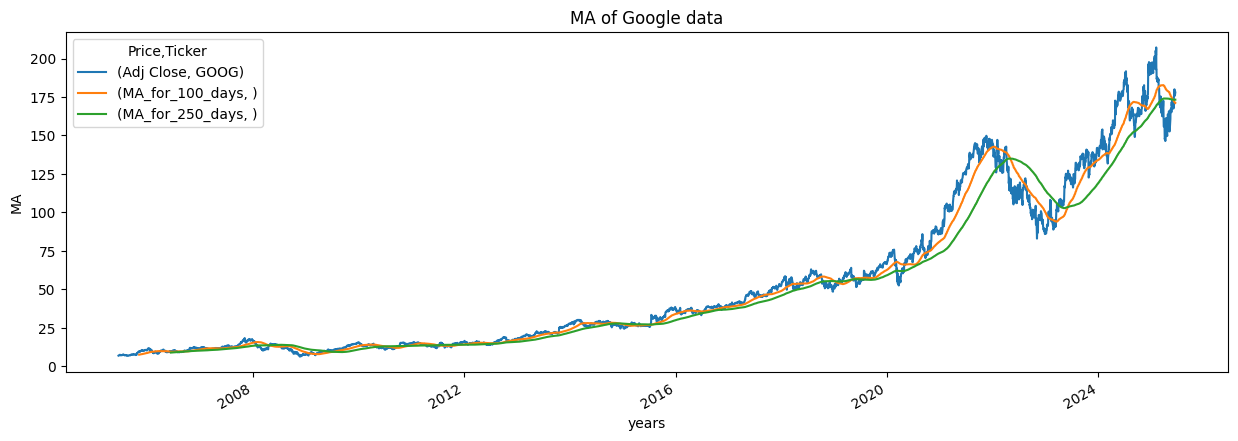

In [19]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [20]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-06-17,6.940079,NaN
2005-06-20,7.098540,0.022833
2005-06-21,7.126766,0.003976
2005-06-22,7.162915,0.005072
2005-06-23,7.173066,0.001417


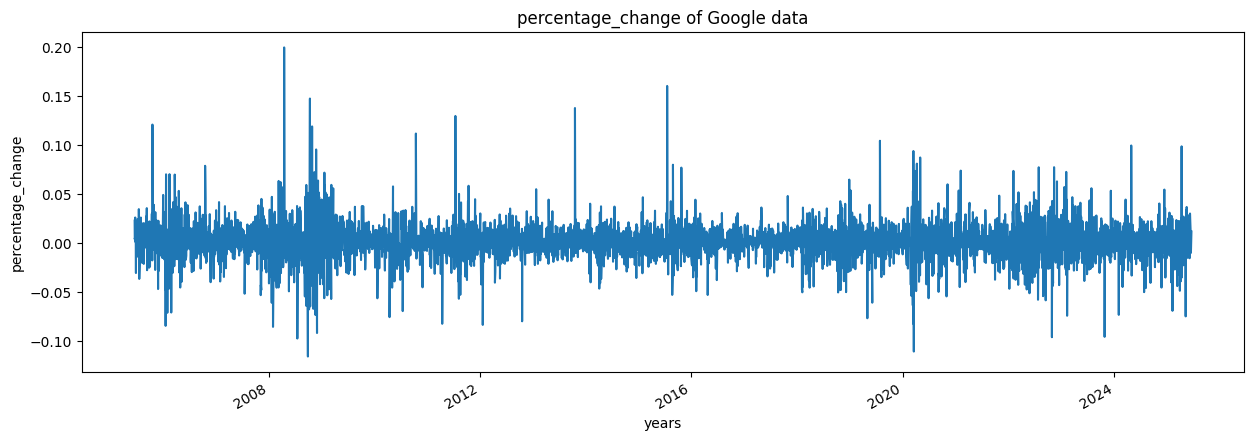

In [21]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [22]:
Adj_close_price = google_data[['Adj Close']]

In [23]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([207.22454834]), array([6.37407684]))

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00281803],
       [0.00360698],
       [0.00374751],
       ...,
       [0.84936781],
       [0.8439409 ],
       [0.85419728]])

In [25]:
len(scaled_data)

5031

In [26]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [27]:
x_data[0],y_data[0]

(array([[0.00281803],
        [0.00360698],
        [0.00374751],
        [0.00392749],
        [0.00397803],
        [0.00490751],
        [0.00575193],
        [0.00549305],
        [0.00434908],
        [0.00452536],
        [0.00416787],
        [0.00471767],
        [0.00420115],
        [0.00469671],
        [0.00478177],
        [0.00442674],
        [0.00423321],
        [0.00510598],
        [0.00535623],
        [0.00539321],
        [0.0051898 ],
        [0.00646691],
        [0.00672579],
        [0.00696494],
        [0.00554236],
        [0.00473493],
        [0.00476451],
        [0.00486807],
        [0.00444524],
        [0.00373765],
        [0.00421225],
        [0.00514666],
        [0.00491368],
        [0.00496668],
        [0.00430347],
        [0.00416787],
        [0.00420732],
        [0.00348124],
        [0.0032803 ],
        [0.00397926],
        [0.00327414],
        [0.00347754],
        [0.00340974],
        [0.00277981],
        [0.00278105],
        [0

In [28]:
int(len(x_data)*0.7)

3451

In [29]:
5031 - 100 - int(len(x_data)*0.7)

1480

In [30]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3451, 100, 1)
(3451, 1)
(1480, 100, 1)
(1480, 1)


In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [33]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 338s 97ms/step - loss: 2.4062e-04
Epoch 2/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 327s 95ms/step - loss: 6.3860e-05


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [37]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step


In [38]:
predictions

array([[0.2631538 ],
       [0.2713831 ],
       [0.2726256 ],
       ...,
       [0.8173598 ],
       [0.81108046],
       [0.80368257]], dtype=float32)

In [39]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 59.228638],
       [ 60.8815  ],
       [ 61.131054],
       ...,
       [170.54118 ],
       [169.27997 ],
       [167.7941  ]], dtype=float32)

In [40]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 61.60431671],
       [ 60.89503098],
       [ 60.47452927],
       ...,
       [176.97000122],
       [175.88000488],
       [177.94000244]])

In [41]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [42]:
rmse

np.float64(5.181131136329492)

In [43]:
import pandas as pd
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-07-29,61.604317,59.228638
2019-07-30,60.895031,60.881500
2019-07-31,60.474529,61.131054
2019-08-01,60.093300,60.704700
2019-08-02,59.346733,60.128578


<Figure size 640x480 with 0 Axes>

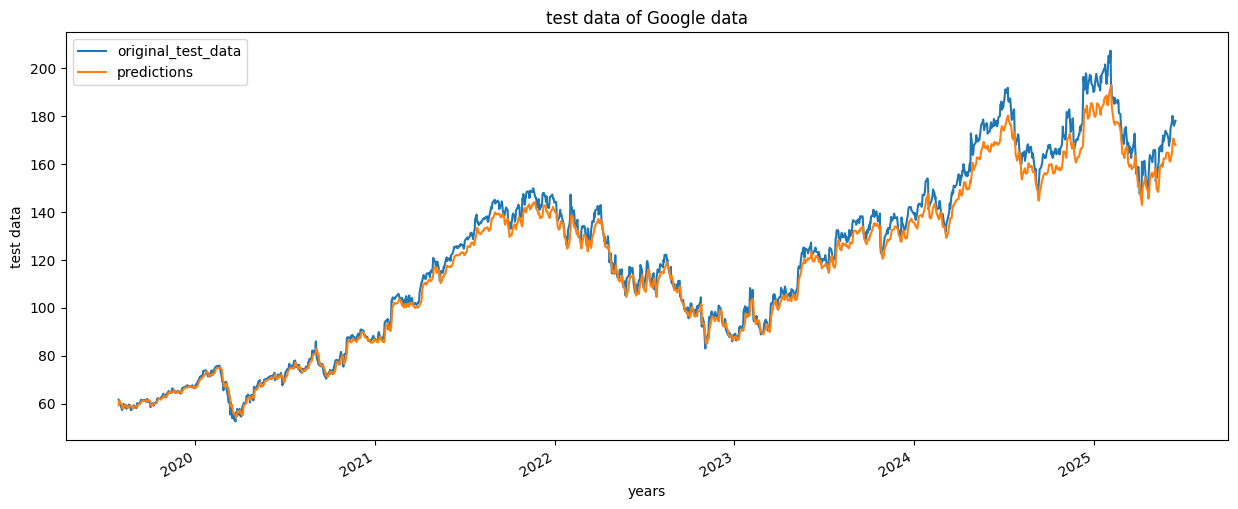

In [44]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

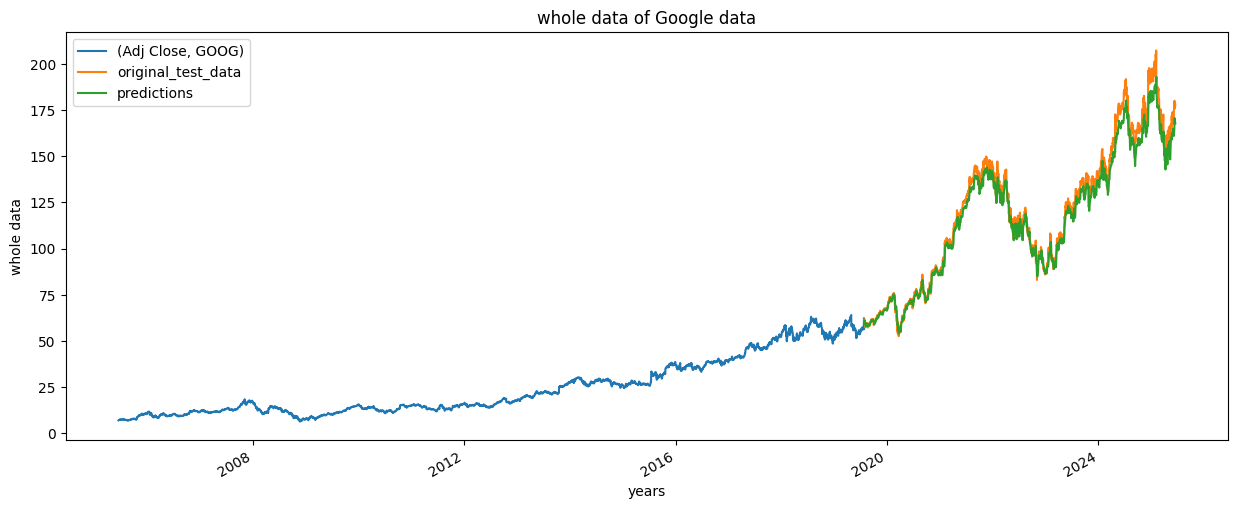

In [45]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [46]:
model.save("Latest_stock_price_model.keras")